## 321 - Visualizing Hurricane Helene with Python’s GOES2GO

[Youtube](https://www.youtube.com/watch?v=lxl1lafTy58)

[GOES2GO](https://github.com/blaylockbk/goes2go)

In [1]:
# !conda install -c conda-forge goes2go -y

In [2]:
from goes2go.data import goes_nearesttime

from datetime import datetime

import matplotlib.pyplot as plt

In [3]:
g = goes_nearesttime(datetime(2024, 12, 1, 18), satellite = 'goes16', product = 'ABI', return_as = 'xarray')

 👮🏻‍♂️ File already exists. Do not overwrite: /home/jessica/data/noaa-goes16/ABI-L2-MCMIPC/2024/336/18/OR_ABI-L2-MCMIPC-M6_G16_s20243361801173_e20243361803546_c20243361804082.nc
📦 Finished downloading [1] files to [/home/jessica/data/noaa-goes16/ABI-L2-MCMIPC].
📚 Finished reading [1] files into xarray.Dataset.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

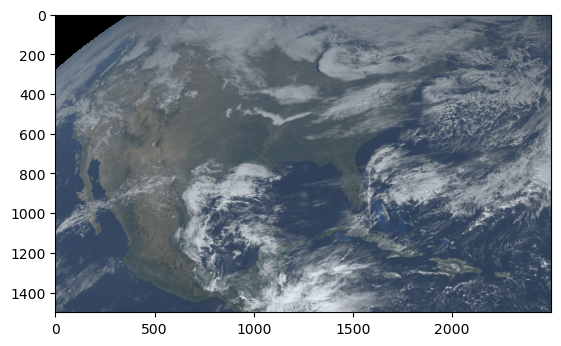

In [4]:
plt.imshow(g.rgb.TrueColor())

In [5]:
images = []
for day in range(20, 31):
    for hour in [13, 18, 23]:
        try:
            g = goes_nearesttime(datetime(2024, 9, day, hour), satellite = 'goes16', product = 'ABI', return_as = 'xarray')
            images.append(g.rgb.TrueColor())
        except FileNotFoundError:
            print(f'No file for {day} - {hour} Z')

 👮🏻‍♂️ File already exists. Do not overwrite: /home/jessica/data/noaa-goes16/ABI-L2-MCMIPC/2024/264/18/OR_ABI-L2-MCMIPC-M6_G16_s20242641801172_e20242641803545_c20242641804072.nc
📦 Finished downloading [1] files to [/home/jessica/data/noaa-goes16/ABI-L2-MCMIPC].
📚 Finished reading [1] files into xarray.Dataset.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

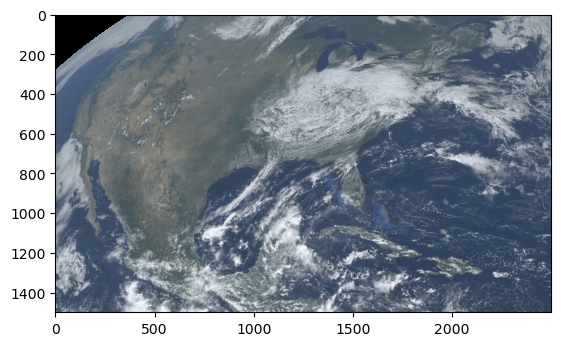

In [6]:
from matplotlib.animation import FuncAnimation

fig, ax = plt.subplots()
img = ax.imshow(images[0])

def update(frame):
    img.set_array(images[frame])
    return [img]

ani = FuncAnimation(fig, update, frames = len(images), interval = 1000, blit = True, repeat = True)

from IPython.display import HTML
HTML(ani.to_jshtml())